In [2]:
# Importing libraries 

# General Libraries

import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from collections import Counter
import matplotlib.pyplot as plt

pd.options.display.max_rows = 96
pd.options.display.max_columns = 96

import warnings
warnings.filterwarnings(action= "ignore")

# Modeling part

import time

from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [3]:
#importing dataset 

data_raw = pd.read_csv('data.csv')

data_raw

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9

# Preliminary data exploration

In [4]:
#data types 

data_raw.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
 Realized Sales Gross Margin                                float64
 Operating Profit Rate                                      float64
 Pre-tax net Interest Rate                                  float64
 After-tax net Interest Rate                                float64
 Non-industry income and expenditure/revenue                float64
 Continuous interest rate (after tax)                       float64
 Operating Expense Rate                                     float64
 Research and development expense rate                      float64
 Cash flow rate                                             float64
 Interest-bearing debt interest rate            

In [5]:
#descriptive statistics 

data_raw.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

In [6]:
# double checking for missin values

[print(col) for col in data_raw if data_raw[col].isna().sum() > 0]

[]

In [7]:
# checking for duplicate observations

data_raw.duplicated().sum()

0

In [8]:
#label balance 

print(data_raw['Bankrupt?'].value_counts())
print('-'*30)

print('Financially stable:', round(data_raw['Bankrupt?'].value_counts()[0]/data_raw.shape[0]*100, 2))
print('Financially unstable:', round(data_raw['Bankrupt?'].value_counts()[1]/data_raw.shape[0]*100, 2))

0    6599
1     220
Name: Bankrupt?, dtype: int64
------------------------------
Financially stable: 96.77
Financially unstable: 3.23


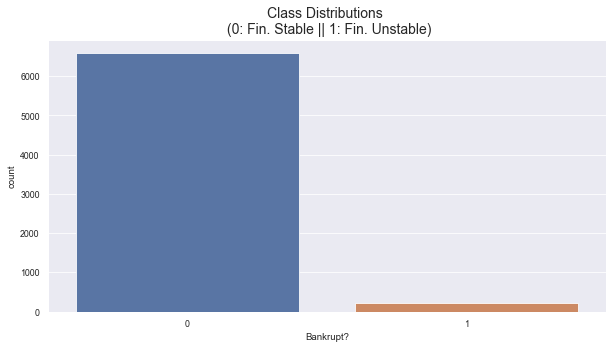

In [9]:
#checking label distribution 

sns.set_theme(context = 'paper')

plt.figure(figsize = (10,5))

sns.countplot(data_raw['Bankrupt?'])
plt.title('Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)', fontsize=14)
plt.show()

The classes are strongly unbalanced. I can solve this issue later with tools from imblear

In [10]:
#splitting dataset into equally class-balanced folds to later rebalance them: 

X = data_raw.copy()
y = data_raw['Bankrupt?']

skfold = StratifiedKFold(n_splits = 5, shuffle = False)

for train_index, test_index in skfold.split(X,y):
    original_Xtrain , original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

#converting into dataframes
original_Xtrain = original_Xtrain.values
original_ytrain = original_ytrain.values
original_Xtest = original_Xtest.values
original_ytest = original_ytest.values


#checking that the labels are equally balanced in both trian and test sets
train_unique_labels, train_label_count = np.unique(original_ytrain, return_counts = True)
test_unique_labels, test_label_count = np.unique(original_ytest, return_counts = True)

print('Label distributions: \n')
print(train_label_count/len(original_ytrain))
print(test_label_count/len(original_ytest))

Label distributions: 

[0.96774194 0.03225806]
[0.96771827 0.03228173]


In [11]:
#shuffling before creating the subsamples

df = data_raw.sample(frac = 1)

unstable_obs =  data_raw.loc[df['Bankrupt?'] == 1]
stable_obs =  data_raw.loc[df['Bankrupt?'] == 0][:220]

normal_df = pd.concat([unstable_obs, stable_obs])

#shuffle df rows 
df_shuffled = normal_df.sample(frac = 1, random_state = 13)

df_shuffled.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
5069,1,0.383952,0.413596,0.428503,0.540891,0.540891,0.997517,0.795313,0.807362,0.302934,0.779723,6.070916e-04,2.066288e-04,0.448138,0.000477,0.000000,0.151447,0.151447,0.151447,0.179257,0.311205,0.004280,0.066363,0.138058,0.022174,0.848085,0.689464,0.689464,0.217605,4.660000e+09,0.000343,0.264303,0.368019,0.015501,0.005724,0.630253,0.015218,0.185265,0.814735,0.005144,0.385143,0.005366,0.066344,0.137011,0.401467,0.022489,0.000726,0.008709,2.520000e+08,2.800000e+09,0.014355,0.004398,0.370774,0.024575,0.807998,0.161631,0.340119,0.096701,0.007205,0.012219,0.041610,0.332014,0.277417,0.021765,0.204058,0.738229,0.329111,0.044984,0.904383,0.001803,0.032600,5.525436e-04,2.674233e-04,0.594151,4.102107e-04,0.671379,0.574616,0.204058,0.329111,0.149585,0.583894,0.451106,0.513096,0.299932,0.018922,0,0.714420,0.000730,0.623818,0.540890,0.829999,0.285816,0.026734,0.564873,1,0.018926
2197,1,0.449959,0.545083,0.500830,0.598502,0.598502,0.998307,0.797668,0.809566,0.305396,0.779625,7.408830e-04,0.000000e+00,0.459499,0.000490,0.044741,0.147023,0.147023,0.147023,0.207998,0.316404,0.000741,0.092908,0.170671,0.022253,0.848143,0.689725,0.689725,0.217618,6.040000e+07,0.000450,0.264595,0.373673,0.007828,0.001239,0.634006,0.015679,0.187351,0.812649,0.005054,0.385929,0.005931,0.092921,0.169708,0.402304,0.004498,0.000373,0.016938,2.680000e+0

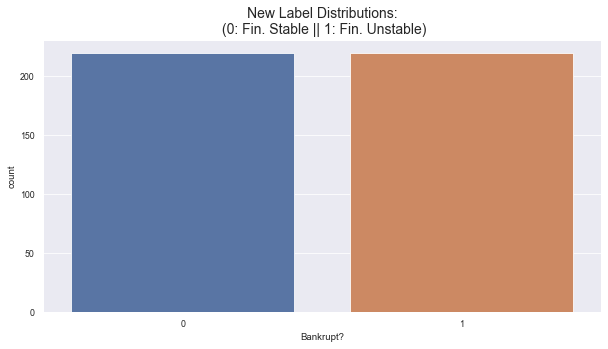

In [12]:
#checking label distributions

sns.set_theme(context = 'paper')

plt.figure(figsize = (10,5))
sns.countplot(df_shuffled['Bankrupt?'])
plt.title('New Label Distributions:\n (0: Fin. Stable || 1: Fin. Unstable)', fontsize = 14)
plt.show()

# EDA & Visualizations

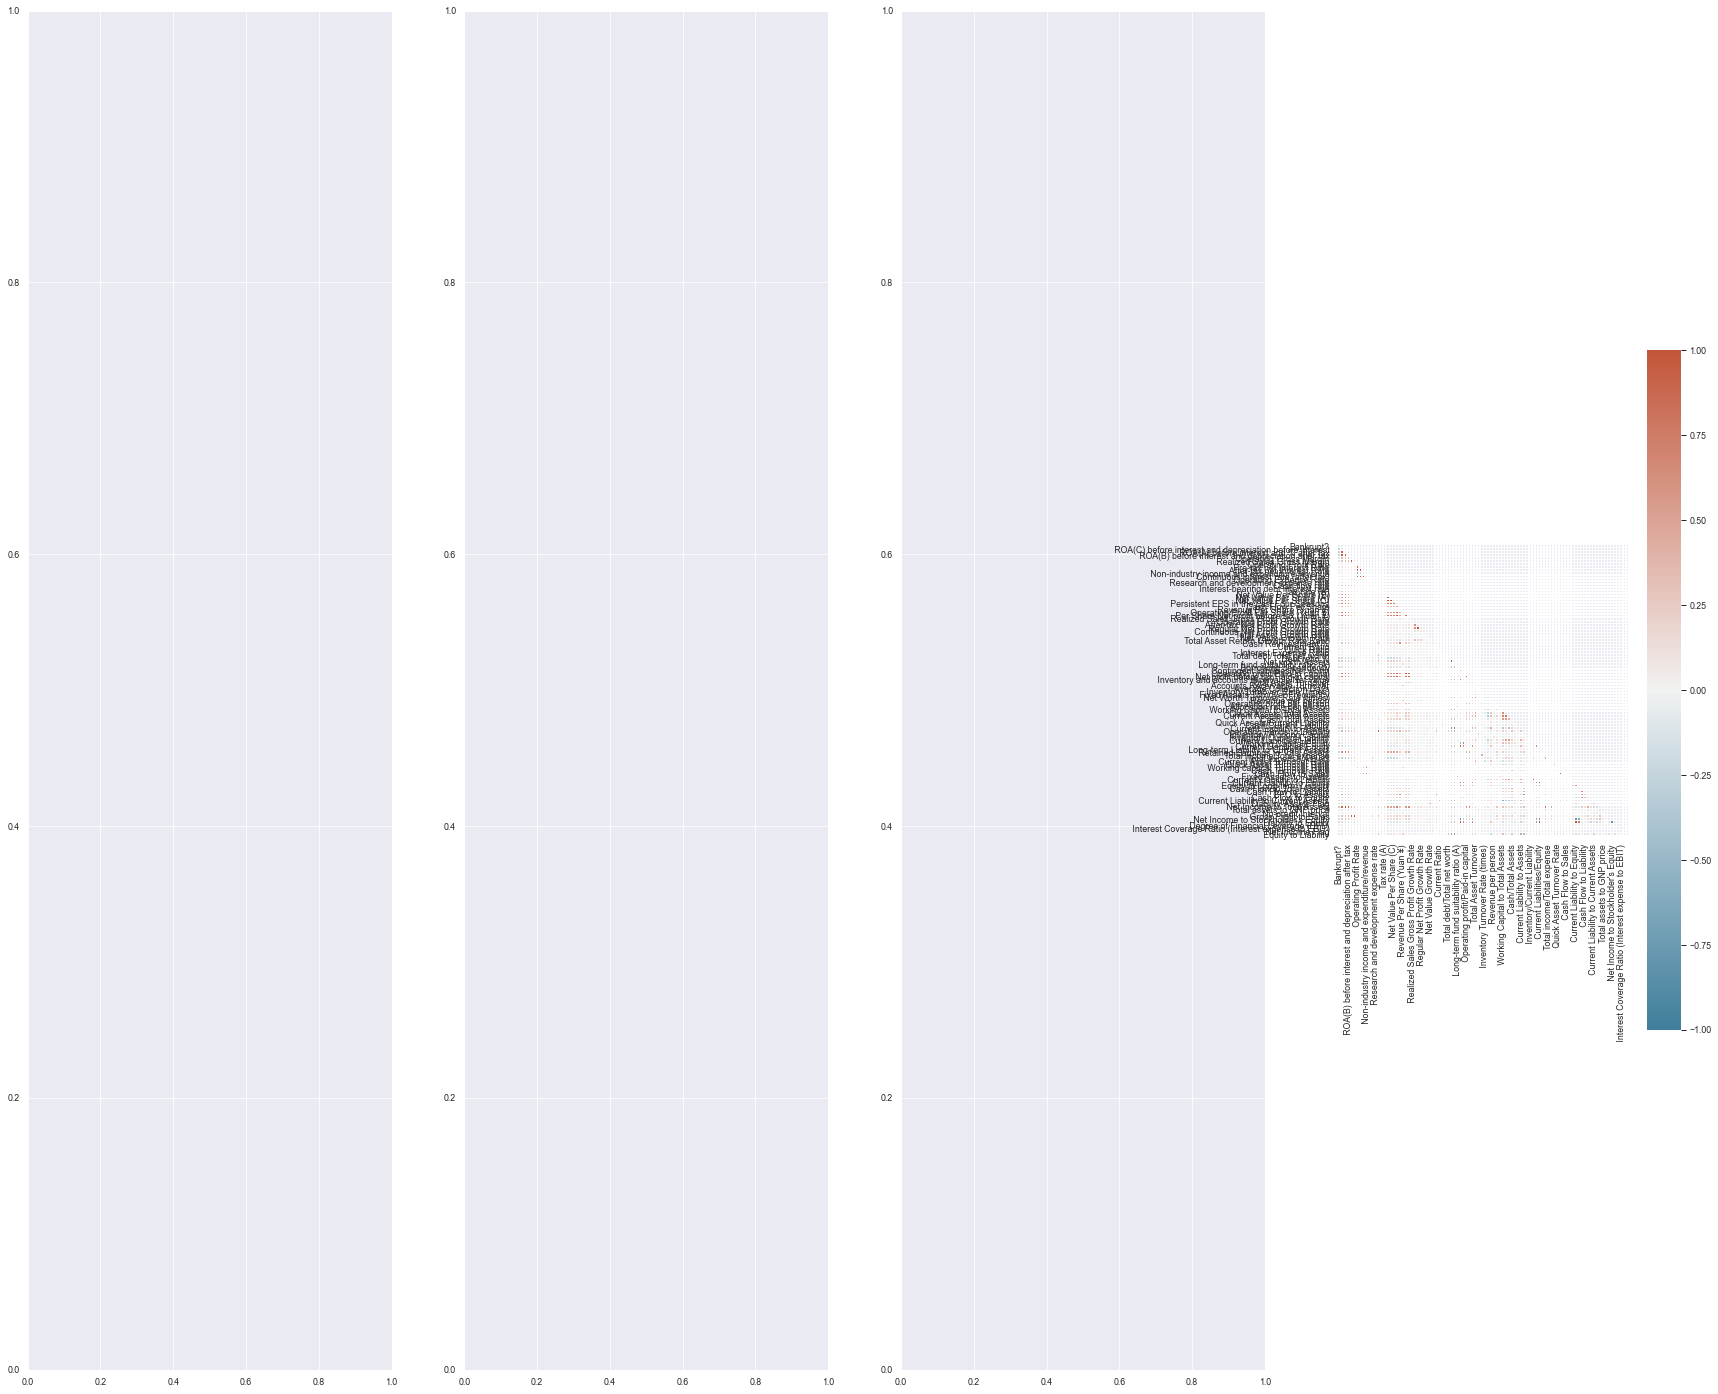

In [23]:
#correlation heatmap 

f, ax = plt.subplots(ncols = 4, figsize = (30,25))

mat = data_raw.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype = bool))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(mat, mask = mask, cmap = cmap, vmax = 1, center = 0, square = True, linewidths = .5, cbar_kws = {"shrink": .5})

plt.show()

Text(0.5, 1.0, 'Bankrupt vs Net Worth/Assets Correlation')

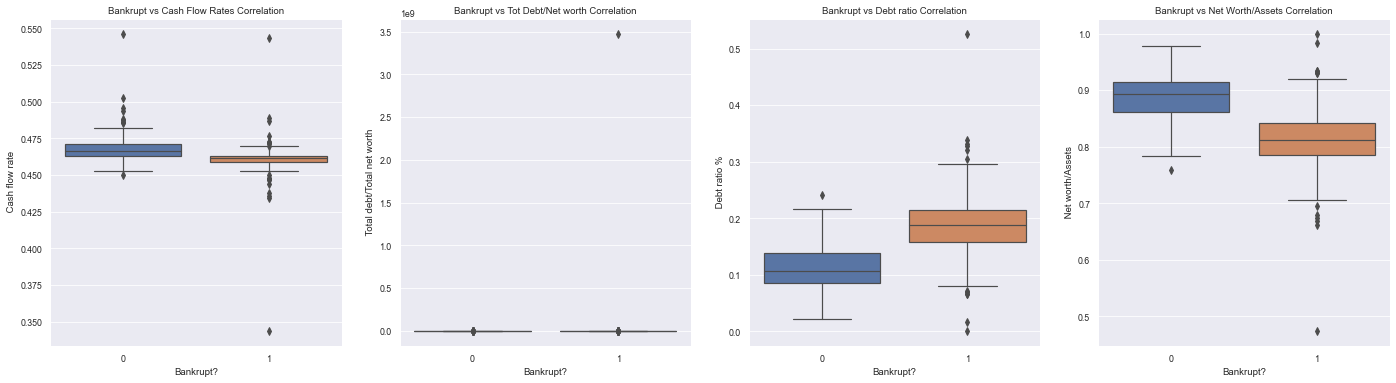

In [14]:
# Plotting features with an interesting correlation

f, axes = plt.subplots(ncols=4, figsize=(24,6))

sns.boxplot(x='Bankrupt?', y=' Cash flow rate', data = df_shuffled, ax=axes[0])
axes[0].set_title('Bankrupt vs Cash Flow Rates Correlation')

sns.boxplot(x='Bankrupt?', y=' Total debt/Total net worth', data=df_shuffled, ax=axes[1]) 
axes[1].set_title('Bankrupt vs Tot Debt/Net worth Correlation')


sns.boxplot(x='Bankrupt?', y=' Debt ratio %', data=df_shuffled, ax=axes[2])
axes[2].set_title('Bankrupt vs Debt ratio Correlation')


sns.boxplot(x='Bankrupt?', y=' Net worth/Assets', data=df_shuffled, ax=axes[3])  
axes[3].set_title('Bankrupt vs Net Worth/Assets Correlation') 

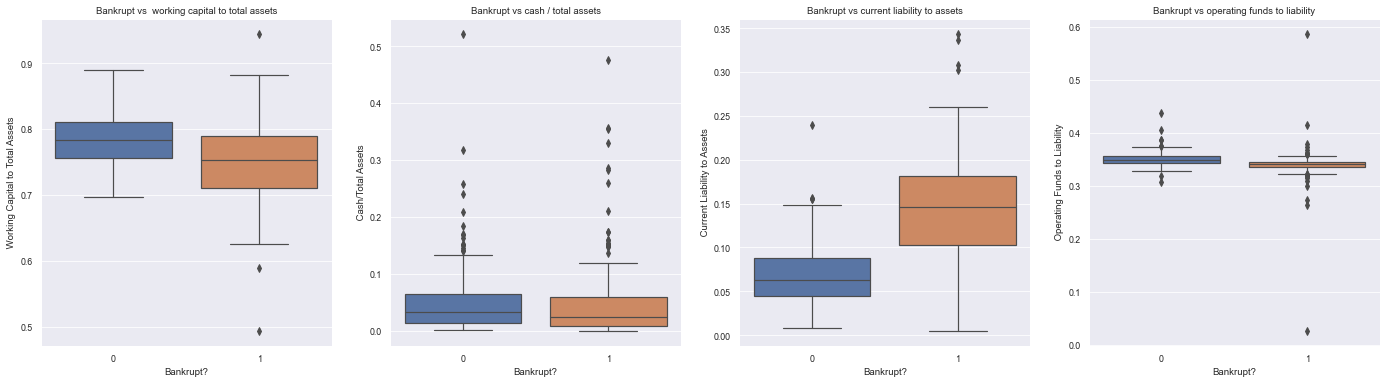

In [15]:
#more interesting correlations plotted

f, axes = plt.subplots(ncols=4, figsize=(24,6))

sns.boxplot(x='Bankrupt?', y=' Working Capital to Total Assets', data=df_shuffled, ax=axes[0])
axes[0].set_title('Bankrupt vs  working capital to total assets')

sns.boxplot(x='Bankrupt?', y=' Cash/Total Assets', data=df_shuffled, ax=axes[1])
axes[1].set_title('Bankrupt vs cash / total assets')


sns.boxplot(x='Bankrupt?', y=' Current Liability to Assets', data=df_shuffled, ax=axes[2])
axes[2].set_title('Bankrupt vs current liability to assets')


sns.boxplot(x='Bankrupt?', y=' Operating Funds to Liability', data=df_shuffled, ax=axes[3])
axes[3].set_title('Bankrupt vs operating funds to liability')


plt.show()

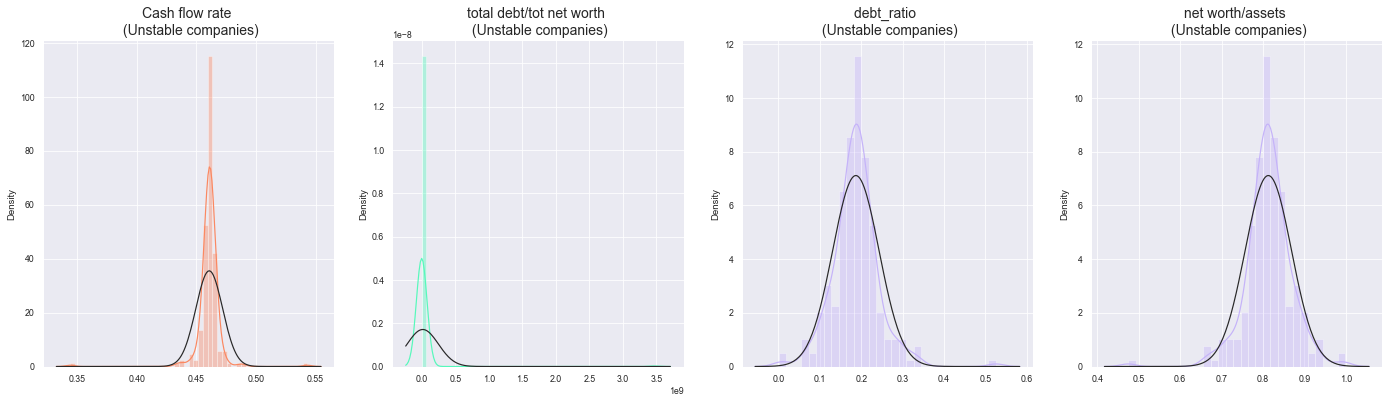

In [16]:
# Plotting the feature distributions for close to bankruptcy companies

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

cash_flow_rate = df_shuffled[' Cash flow rate'].loc[df_shuffled['Bankrupt?'] == 1].values
sns.distplot(cash_flow_rate,ax=ax1, fit=norm, color = '#FB8861')
ax1.set_title('Cash flow rate \n (Unstable companies)', fontsize=14)

tot_debt_net = df_shuffled[' Total debt/Total net worth'].loc[df_shuffled['Bankrupt?'] == 1].values
sns.distplot(tot_debt_net ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('total debt/tot net worth \n (Unstable companies)', fontsize=14)


debt_ratio = df_shuffled[' Debt ratio %'].loc[df_shuffled['Bankrupt?'] == 1].values
sns.distplot(debt_ratio,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('debt_ratio \n (Unstable companies)', fontsize=14)

net_worth_assets = df_shuffled[' Net worth/Assets'].loc[df_shuffled['Bankrupt?'] == 1].values
sns.distplot(net_worth_assets,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('net worth/assets \n (Unstable companies)', fontsize=14)

plt.show()

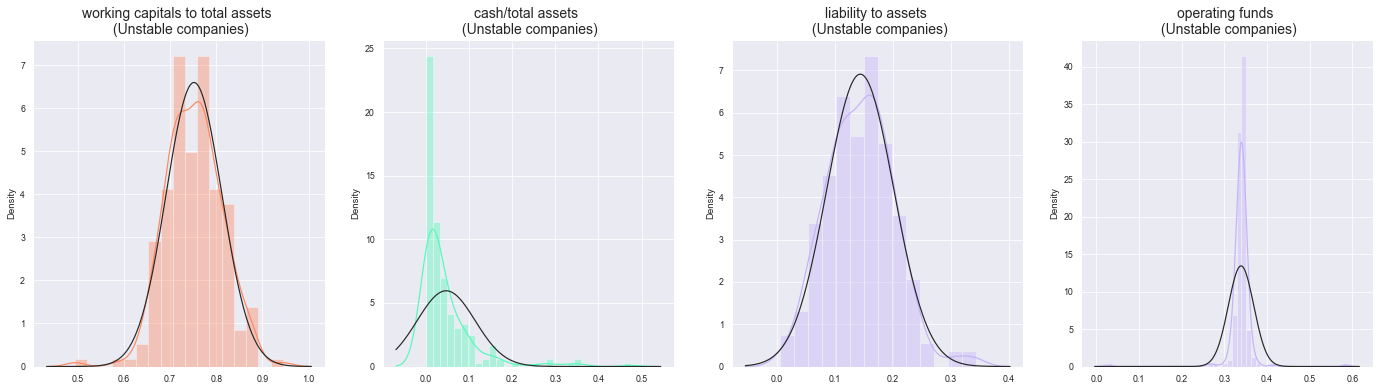

In [17]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

working_cap = df_shuffled[' Working Capital to Total Assets'].loc[df_shuffled['Bankrupt?'] == 1].values
sns.distplot(working_cap,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('working capitals to total assets \n (Unstable companies)', fontsize=14)

cash_tot_assets = df_shuffled[' Cash/Total Assets'].loc[df_shuffled['Bankrupt?'] == 1].values
sns.distplot(cash_tot_assets ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('cash/total assets \n (Unstable companies)', fontsize=14)


asset_liab = df_shuffled[' Current Liability to Assets'].loc[df_shuffled['Bankrupt?'] == 1].values
sns.distplot(asset_liab,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('liability to assets \n (Unstable companies)', fontsize=14)

operating_funds = df_shuffled[' Operating Funds to Liability'].loc[df_shuffled['Bankrupt?'] == 1].values
sns.distplot(operating_funds,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('operating funds \n (Unstable companies)', fontsize=14)

plt.show()

Outliers removal

In [18]:
# Outliers removal function

def outliers_removal(feature,feature_name, dataset):
    
    # Identifying 25th & 75th quartiles

    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    feat_iqr = q75 - q25
    print('iqr: {}'.format(feat_iqr))
    
    #degining cut-off point & lower and upper limits
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))

    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    print('-' * 65)
    
    return dataset

df_no_outliers = df_shuffled.copy()

df_no_outliers = outliers_removal(df_no_outliers[' Cash flow rate'],' Cash flow rate', df_no_outliers)
df_no_outliers = outliers_removal(df_no_outliers[' Total debt/Total net worth'],' Total debt/Total net worth', df_no_outliers)
df_no_outliers = outliers_removal(df_no_outliers[' Debt ratio %'],' Debt ratio %', df_no_outliers)
df_no_outliers = outliers_removal(df_no_outliers[' Net worth/Assets'],' Net worth/Assets', df_no_outliers)
df_no_outliers = outliers_removal(df_no_outliers[' Working Capital to Total Assets'],' Working Capital to Total Assets', df_no_outliers)
df_no_outliers = outliers_removal(df_no_outliers[' Cash/Total Assets'],' Cash/Total Assets', df_no_outliers)
df_no_outliers = outliers_removal(df_no_outliers[' Current Liability to Assets'],' Current Liability to Assets', df_no_outliers)
df_no_outliers = outliers_removal(df_no_outliers[' Operating Funds to Liability'],' Operating Funds to Liability', df_no_outliers)

Quartile 25: 0.46051139461345525 | Quartile 75: 0.46712672890298
iqr: 0.006615334289524766
Cut Off: 0.009923001434287149
 Cash flow rate Lower: 0.4505883931791681
 Cash flow rate Upper: 0.47704973033726716
 Cash flow rate outliers for close to bankruptcy cases: 33
-----------------------------------------------------------------
Quartile 25: 0.0051865327971256 | Quartile 75: 0.0172990816987206
iqr: 0.012112548901595
Cut Off: 0.0181688233523925
 Total debt/Total net worth Lower: -0.012982290555266902
 Total debt/Total net worth Upper: 0.0354679050511131
 Total debt/Total net worth outliers for close to bankruptcy cases: 24
-----------------------------------------------------------------
Quartile 25: 0.1043927804819055 | Quartile 75: 0.187910028116214
iqr: 0.08351724763430848
Cut Off: 0.12527587145146274
 Debt ratio % Lower: -0.020883090969557233
 Debt ratio % Upper: 0.31318589956767673
 Debt ratio % outliers for close to bankruptcy cases: 1
---------------------------------------------

Visualizing changes in boxplots and distributions : 

Text(0.5, 1.0, 'Bankrupt vs Net Worth/Assets Correlation')

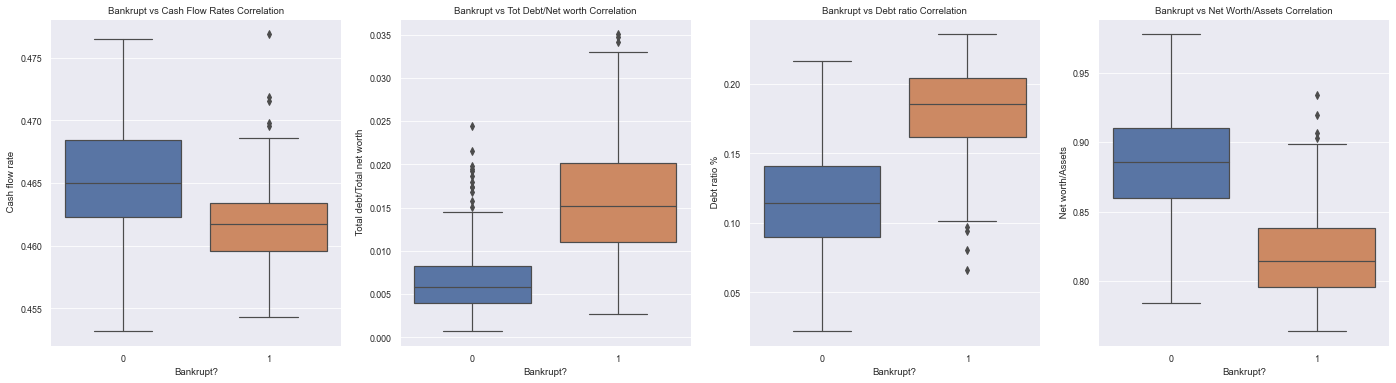

In [19]:
f, axes = plt.subplots(ncols=4, figsize=(24,6))

sns.boxplot(x='Bankrupt?', y=' Cash flow rate', data = df_no_outliers, ax=axes[0])
axes[0].set_title('Bankrupt vs Cash Flow Rates Correlation')

sns.boxplot(x='Bankrupt?', y=' Total debt/Total net worth', data=df_no_outliers, ax=axes[1]) 
axes[1].set_title('Bankrupt vs Tot Debt/Net worth Correlation')


sns.boxplot(x='Bankrupt?', y=' Debt ratio %', data=df_no_outliers, ax=axes[2])
axes[2].set_title('Bankrupt vs Debt ratio Correlation')


sns.boxplot(x='Bankrupt?', y=' Net worth/Assets', data=df_no_outliers, ax=axes[3])  
axes[3].set_title('Bankrupt vs Net Worth/Assets Correlation') 

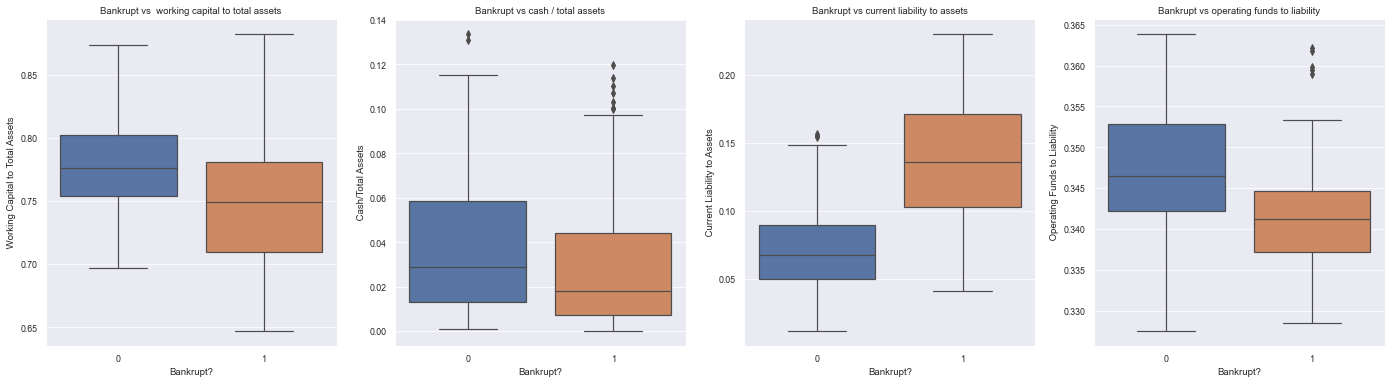

In [20]:
f, axes = plt.subplots(ncols=4, figsize=(24,6))

sns.boxplot(x='Bankrupt?', y=' Working Capital to Total Assets', data=df_no_outliers, ax=axes[0])
axes[0].set_title('Bankrupt vs  working capital to total assets')

sns.boxplot(x='Bankrupt?', y=' Cash/Total Assets', data=df_no_outliers, ax=axes[1])
axes[1].set_title('Bankrupt vs cash / total assets')


sns.boxplot(x='Bankrupt?', y=' Current Liability to Assets', data=df_no_outliers, ax=axes[2])
axes[2].set_title('Bankrupt vs current liability to assets')


sns.boxplot(x='Bankrupt?', y=' Operating Funds to Liability', data=df_no_outliers, ax=axes[3])
axes[3].set_title('Bankrupt vs operating funds to liability')


plt.show()

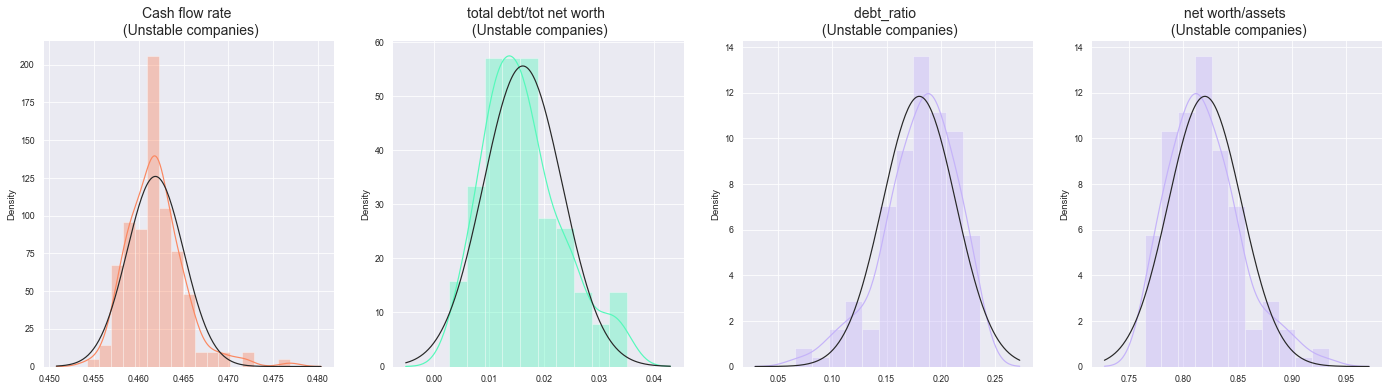

In [21]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

cash_flow_rate = df_no_outliers[' Cash flow rate'].loc[df_no_outliers['Bankrupt?'] == 1].values
sns.distplot(cash_flow_rate,ax=ax1, fit=norm, color = '#FB8861')
ax1.set_title('Cash flow rate \n (Unstable companies)', fontsize=14)

tot_debt_net = df_no_outliers[' Total debt/Total net worth'].loc[df_no_outliers['Bankrupt?'] == 1].values
sns.distplot(tot_debt_net ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('total debt/tot net worth \n (Unstable companies)', fontsize=14)


debt_ratio = df_no_outliers[' Debt ratio %'].loc[df_no_outliers['Bankrupt?'] == 1].values
sns.distplot(debt_ratio,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('debt_ratio \n (Unstable companies)', fontsize=14)

net_worth_assets = df_no_outliers[' Net worth/Assets'].loc[df_no_outliers['Bankrupt?'] == 1].values
sns.distplot(net_worth_assets,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('net worth/assets \n (Unstable companies)', fontsize=14)

plt.show()

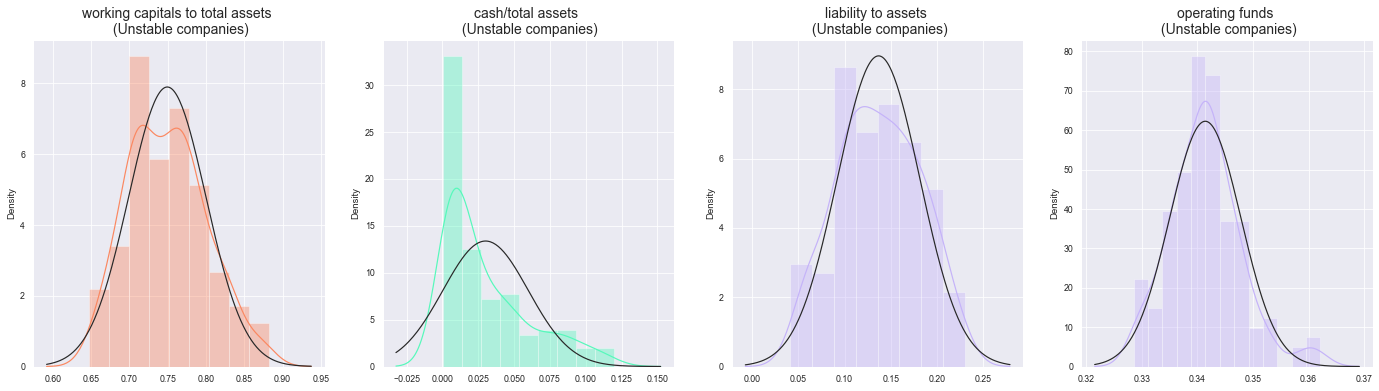

In [22]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

working_cap = df_no_outliers[' Working Capital to Total Assets'].loc[df_no_outliers['Bankrupt?'] == 1].values
sns.distplot(working_cap,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('working capitals to total assets \n (Unstable companies)', fontsize=14)

cash_tot_assets = df_no_outliers[' Cash/Total Assets'].loc[df_no_outliers['Bankrupt?'] == 1].values
sns.distplot(cash_tot_assets ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('cash/total assets \n (Unstable companies)', fontsize=14)


asset_liab = df_no_outliers[' Current Liability to Assets'].loc[df_no_outliers['Bankrupt?'] == 1].values
sns.distplot(asset_liab,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('liability to assets \n (Unstable companies)', fontsize=14)

operating_funds = df_no_outliers[' Operating Funds to Liability'].loc[df_no_outliers['Bankrupt?'] == 1].values
sns.distplot(operating_funds,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('operating funds \n (Unstable companies)', fontsize=14)

plt.show()

# Next: Modelling 

In [ ]:
#Models to be tested/used: 

#Supervised learning: logistic regression, catboost regressor 

#Unsupervised learning: PCA, TSNE, Truncated SVC 

In [43]:
#splitting the undersampled dataset

targets = df_no_outliers['Bankrupt?']
features = df_no_outliers.drop(['Bankrupt?'], axis = 1)

#creating test set
x_train, x_test, y_train, y_test = train_test_split(features, 
                                                    targets, 
                                                    test_size = 0.1, 
                                                    stratify = targets, 
                                                    shuffle = True, 
                                                    random_state = 13)
#validation set 
xtrain, xval, ytrain, yval = train_test_split(x_train,
                                            y_train,
                                            test_size = 0.1,
                                            stratify = y_train, 
                                            shuffle = True, 
                                            random_state = 13)

In [44]:
# logistic regression -- Undersampled data

log = LogisticRegression()

log_model = log.fit(x_train, y_train)
log_pred = log_model.predict(xval)

print(classification_report(yval, log_pred))

              precision    recall  f1-score   support

           0       0.53      0.62      0.57        16
           1       0.50      0.40      0.44        15

    accuracy                           0.52        31
   macro avg       0.51      0.51      0.51        31
weighted avg       0.51      0.52      0.51        31



In [49]:
#catboost classifier -- Undersampled data

params = {'loss_function':'Logloss',
         'eval_metric':'BalancedAccuracy',
         'verbose':200,
         'random_seed' : 13}

cat = CatBoostClassifier(**params)
cat_model = cat.fit(x_train, 
                    y_train,
                    eval_set = (xval, yval),
                    use_best_model = True,
                    verbose = 0,
                    plot = True)

cat_pred = cat_model.predict(xval)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [51]:
print(classification_report(yval, cat_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        15

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



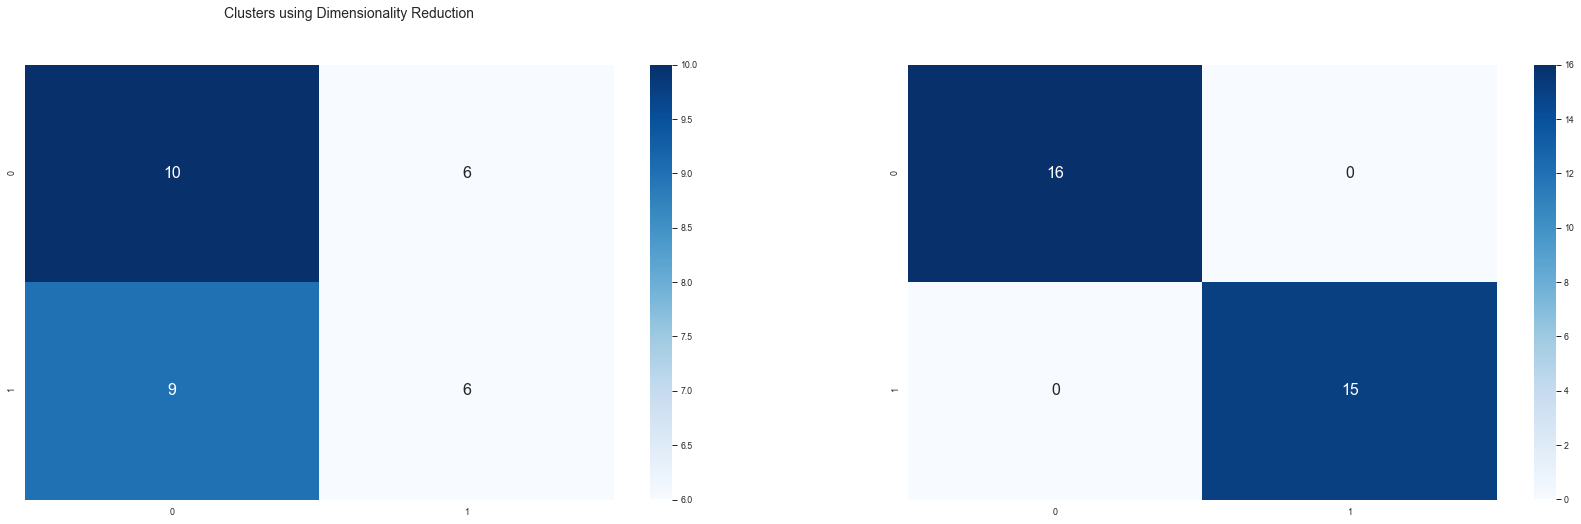

In [57]:
#comparing confusion matrices

cm_log = confusion_matrix(yval, log_pred)
cm_cat = confusion_matrix(yval, cat_pred)

heatmap_log = pd.DataFrame(cm_log, columns = np.unique(yval), index = np.unique(yval))
heatmap_log.index.name = 'Actual'
heatmap_log.columns.name = 'Predicted'

heatmap_cat = pd.DataFrame(cm_cat, columns = np.unique(yval), index = np.unique(yval))
heatmap_cat.index.name = 'Actual'
heatmap_cat.columns.name = 'Predicted'

f, (ax1, ax2) = plt.subplots(1,2, figsize = (12,8))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)
f.subplots_adjust(left=None, bottom=None, right= 2, top=None, wspace=None, hspace= None)

sns.heatmap(cm_log, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax1)
sns.heatmap(cm_cat, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax2)

plt.show()

Conclusion: The catboost model is far superior

In [58]:
#Unsupervised learning -- Undersampled data

#TSNE 
t0 = time.time()
x_reduced_tsne = TSNE(n_components = 2, random_state = 13).fit_transform(x_train.values)
t1 = time.time()
print("TSNE took {:.2} s".format(t1 - t0))

#PCA 
t0 = time.time()
x_reduced_pca = PCA(n_components = 2, random_state = 13).fit_transform(x_train.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

#Truncated SVD
t0 = time.time()
x_reduced_svd = TruncatedSVD(n_components = 2, algorithm = 'randomized', random_state = 13).fit_transform(x_train.values)
t1 = time.time()
print("Trun. SVD took {:.2} s".format(t1 - t0))

TSNE took 1.8 s
PCA took 0.13 s
Trun. SVD took 0.068 s


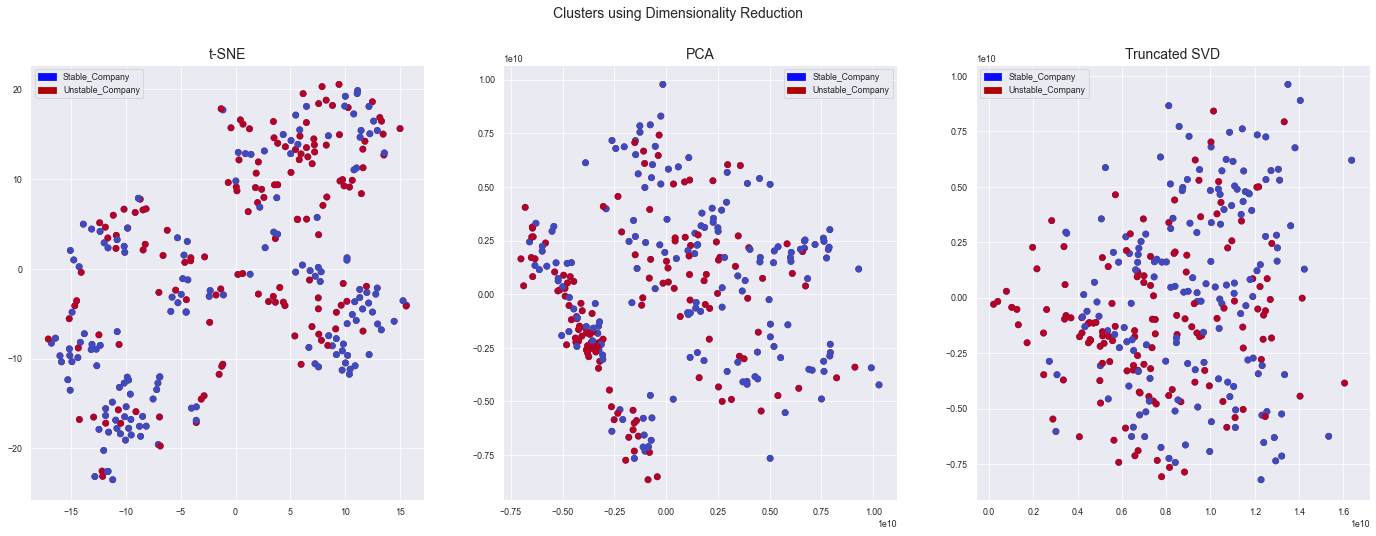

In [59]:
# Plotting unsupervised components -- Undersampled data

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,8))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='Stable_Company')
red_patch = mpatches.Patch(color='#AF0000', label='Unstable_Company') 


# t-SNE scatter plot
ax1.scatter(x_reduced_tsne[:,0], x_reduced_tsne[:,1], c=(y_train == 0),cmap='coolwarm', label='Stable_Company', linewidths=2)
ax1.scatter(x_reduced_tsne[:,0], x_reduced_tsne[:,1], c=(y_train == 1),cmap='coolwarm', label='Unstable_Company', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(x_reduced_pca[:,0], x_reduced_pca[:,1], c=(y_train == 0), cmap='coolwarm', label= 'Stable_Company', linewidths=2)
ax2.scatter(x_reduced_pca[:,0], x_reduced_pca[:,1], c=(y_train == 1), cmap='coolwarm', label= 'Unstable_Company', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(x_reduced_svd[:,0], x_reduced_svd[:,1], c=(y_train == 0), cmap='coolwarm', label= 'Stable_Company', linewidths=2)
ax3.scatter(x_reduced_svd[:,0], x_reduced_svd[:,1], c=(y_train == 1), cmap='coolwarm', label= 'Unstable_Company', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

The model seems to perform perfectly. However, to ensure that no information is being lost in the undersampling I will test a model with Oversampled data using SMOTE. 

In [83]:
original_targets = data_raw['Bankrupt?']
original_features = data_raw.drop(['Bankrupt?'], axis =1)

oversample = SMOTE()

x_smote, y_smote = oversample.fit_resample(original_features, original_targets)
counter = Counter(y_smote)
print(counter)

#splitting the data: 

x_train_sm,x_test_sm,y_train_sm,y_test_sm = train_test_split(x_smote, y_smote,
                                               test_size = 0.1,
                                               stratify = y_smote,
                                               shuffle = True)

xtrain_sm, xval_sm, ytrain_sm, yval_sm = train_test_split(x_train_sm, y_train_sm,
                                               test_size = 0.1,
                                               stratify = y_train_sm,
                                               shuffle = True)

Counter({1: 6599, 0: 6599})


In [84]:
#Logistic Regression -- Oversampled Data

log_sm = LogisticRegression()
log_model_sm = log_sm.fit(x_train_sm, y_train_sm)
log_pred_sm = log_model_sm.predict(xval_sm)

print(classification_report(yval_sm, log_pred_sm))

              precision    recall  f1-score   support

           0       0.60      0.74      0.67       594
           1       0.67      0.51      0.58       594

    accuracy                           0.63      1188
   macro avg       0.64      0.63      0.62      1188
weighted avg       0.64      0.63      0.62      1188



In [91]:
#catboost classifier -- Oversampled data

params = {'loss_function':'Logloss',
         'eval_metric':'BalancedAccuracy',
         'verbose':200,
         'random_seed' : 13}

cat = CatBoostClassifier(**params)
cat_model_sm = cat.fit(x_train_sm, 
                    y_train_sm,
                    eval_set = (xval_sm, yval_sm),
                    use_best_model = True,
                    verbose = 0,
                    plot = True)

cat_pred_sm = cat_model_sm.predict(xval_sm)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [92]:
#Classification report 

print(classification_report(yval_sm, cat_pred_sm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       594

    accuracy                           1.00      1188
   macro avg       1.00      1.00      1.00      1188
weighted avg       1.00      1.00      1.00      1188



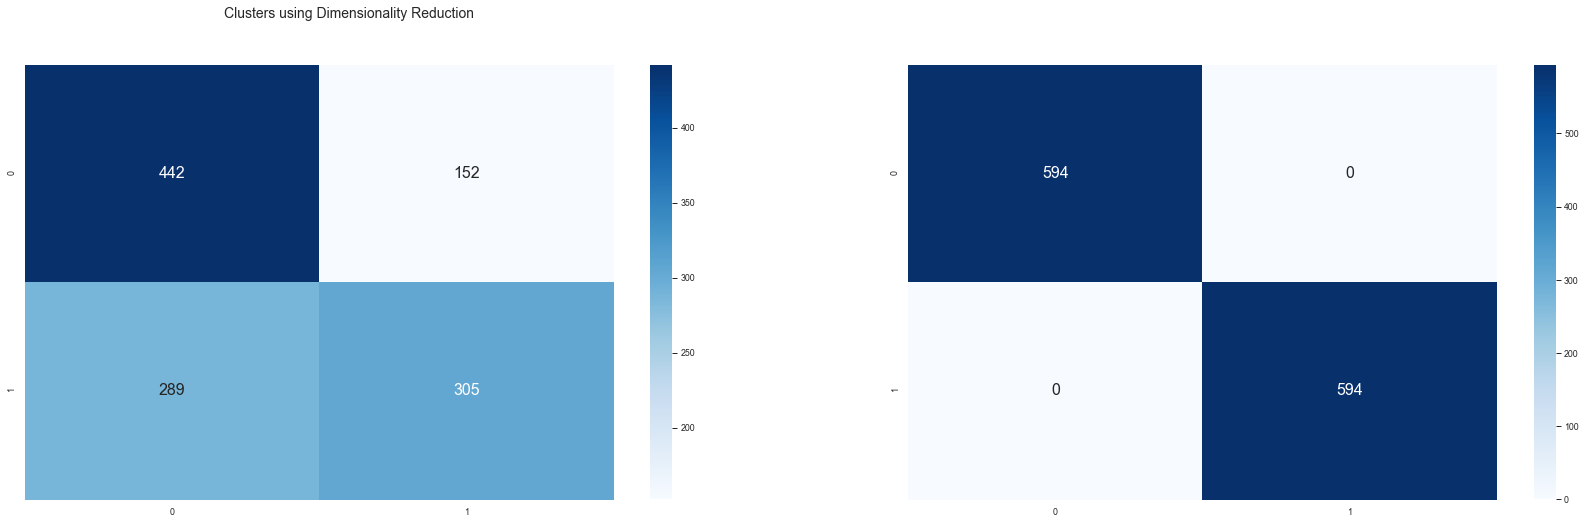

In [93]:
#comparing confusion matrices for oversampled data

cm_log_sm = confusion_matrix(yval_sm, log_pred_sm)
cm_cat_sm = confusion_matrix(yval_sm, cat_pred_sm)

heatmap_log = pd.DataFrame(cm_log_sm, columns = np.unique(yval_sm), index = np.unique(yval_sm))
heatmap_log.index.name = 'Actual'
heatmap_log.columns.name = 'Predicted'

heatmap_cat = pd.DataFrame(cm_cat_sm, columns = np.unique(yval_sm), index = np.unique(yval_sm))
heatmap_cat.index.name = 'Actual'
heatmap_cat.columns.name = 'Predicted'

f, (ax1, ax2) = plt.subplots(1,2, figsize = (12,8))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)
f.subplots_adjust(left=None, bottom=None, right= 2, top=None, wspace=None, hspace= None)

sns.heatmap(cm_log_sm, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax1)
sns.heatmap(cm_cat_sm, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax2)

plt.show()

In [94]:
# Features' importance in the catboost model

feat_imp = cat_model_sm.get_feature_importance(prettified=True)
feat_imp

,Feature Id,Importances
0,Total debt/Total net worth,5.311410
1,Cash Turnover Rate,5.245589
2,Interest-bearing debt interest rate,3.801969
3,Allocation rate per person,3.669414
4,Net Income to Total Assets,3.549360
5,Research and development expense rate,3.466323
6,Continuous interest rate (after tax),2.740583
7,Average Collection Days,2.567886
8,Contingent liabilities/Net worth,2.401256
9,Fixed Assets Turnover Frequency,2.361640


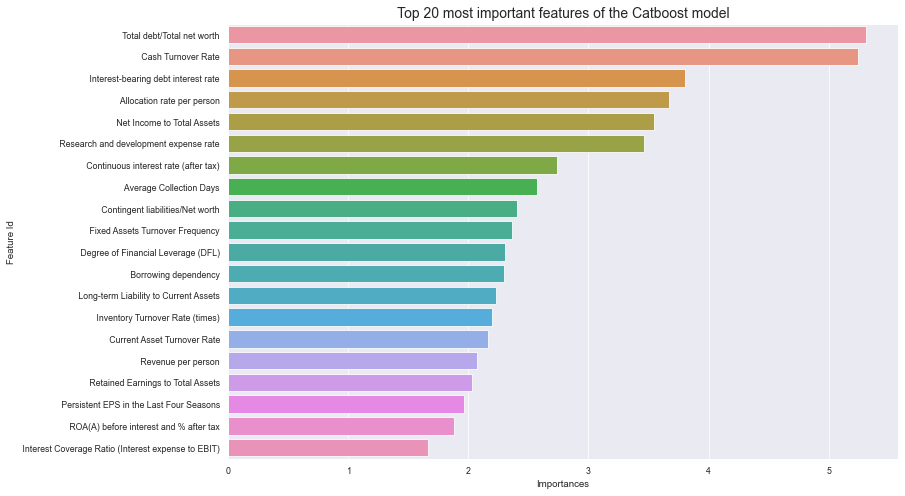

In [95]:
# Plotting top 20 features' importance

plt.figure(figsize = (12,8))
sns.barplot(feat_imp['Importances'][:20],feat_imp['Feature Id'][:20], orient = 'h')
plt.title('Top 20 most important features of the Catboost model', fontsize = 14)
plt.show()

In [90]:
# Looking at the stats of the most important feature

feat_stats = cat_model_sm.calc_feature_statistics(x_train_sm,
                                                  target = y_train_sm,
                                                  feature= 73,
                                                  prediction_type='Class',
                                                  plot=True,
                                                  thread_count=-1)
                                                   

Conclusion: Catboost lassifier achieved a practically perfect performance, and not just in terms of accuracy, but also in all the other metrics: precision, recall, and F1_score. 

In [96]:
#Cluster analysis -- Oversampled data

# T-SNE Implementation
t0 = time.time()
x_reduced_tsne_sm = TSNE(n_components=2, random_state=13).fit_transform(x_smote.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
x_reduced_pca_sm = PCA(n_components=2, random_state=13).fit_transform(x_smote.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
x_reduced_svd_sm = TruncatedSVD(n_components=2, algorithm='randomized', random_state=13).fit_transform(x_smote.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 8.7e+01 s
PCA took 0.12 s
Truncated SVD took 0.074 s


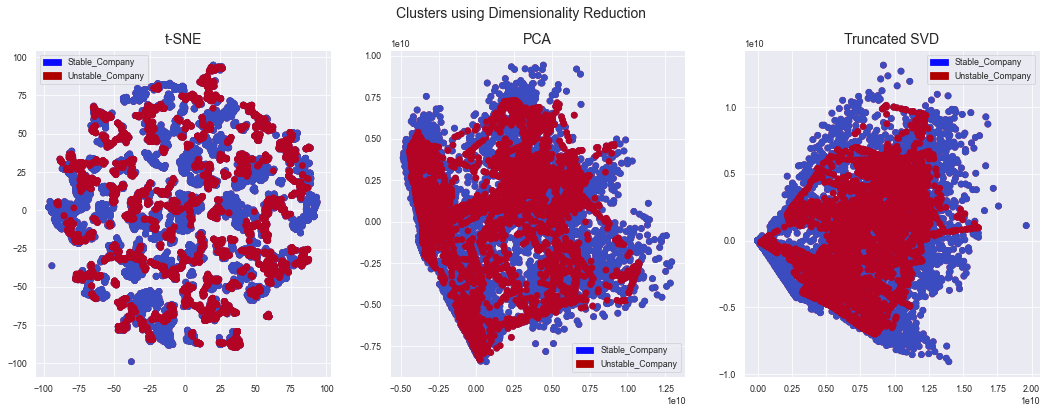

In [99]:
#plotting clusters -- Oversampled Data

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='Stable_Company')
red_patch = mpatches.Patch(color='#AF0000', label='Unstable_Company')


# t-SNE scatter plot
ax1.scatter(x_reduced_tsne_sm[:,0], x_reduced_tsne_sm[:,1], c=(y_smote == 0), cmap='coolwarm', label='Stable_Company', linewidths=2)
ax1.scatter(x_reduced_tsne_sm[:,0], x_reduced_tsne_sm[:,1], c=(y_smote == 1), cmap='coolwarm', label='Unstable_Company', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(x_reduced_pca_sm[:,0], x_reduced_pca_sm[:,1], c=(y_smote == 0), cmap='coolwarm', label= 'Stable_Company', linewidths=2)
ax2.scatter(x_reduced_pca_sm[:,0], x_reduced_pca_sm[:,1], c=(y_smote == 1), cmap='coolwarm', label= 'Unstable_Company', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(x_reduced_svd_sm[:,0], x_reduced_svd_sm[:,1], c=(y_smote == 0), cmap='coolwarm', label= 'Stable_Company', linewidths=2)
ax3.scatter(x_reduced_svd_sm[:,0], x_reduced_svd_sm[:,1], c=(y_smote == 1), cmap='coolwarm', label= 'Unstable_Company', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

# Testing


In [98]:
# let's see the final performance of our best model on the test data

test_pred = cat_model_sm.predict(x_test_sm)
print(classification_report(y_test_sm, test_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       660
           1       0.97      0.99      0.98       660

    accuracy                           0.98      1320
   macro avg       0.98      0.98      0.98      1320
weighted avg       0.98      0.98      0.98      1320



Thats it. Model's ready for deployment (though with so many input features, it might not be worth it).